# Convolutional Neural Network Using SVM as Final Layer

In [1]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

os.listdir(path)

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['readme[1].txt', 'MSR-LA - 3467.docx', 'PetImages']

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-03-27 11:35:36.439105: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-27 11:35:36.453675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743054636.467102    2064 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743054636.471277    2064 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-27 11:35:36.490130: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
os.listdir(f'{path}/PetImages')

['test', 'train']

In [24]:

# Step 1 - Data Preprocessing

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)
traning_set = train_datagen.flow_from_directory(f'{path}/PetImages/train',
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(f'{path}/PetImages/test',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 19650 images belonging to 2 classes.
Found 5100 images belonging to 2 classes.


In [25]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [26]:
#step 2 for 

cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters = 32,input_shape = [64,64,3],padding = 'same',kernel_size = 3,activation='relu',strides=2))

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides = 2))

cnn.add(tf.keras.layers.Conv2D(filters = 32,padding = 'same',kernel_size = 3,activation='relu',kernel_initializer='he_uniform',strides=2))

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides = 2))


cnn.add(tf.keras.layers.Flatten())

#cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))




In [20]:
## for multiclassificaton 
#cnn.add(Dense(3,kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
#cnn.compile(optimizer='adam',loss = 'squared_hinge',metrics = ['accuracy'])


In [27]:
# for binary classifiaation
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))
cnn.compile(optimizer='adam',loss = 'hinge',metrics = ['accuracy'])

In [28]:
cnn.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,657 (41.63 KB)

 Trainable params: 10,657 (41.63 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
r = cnn.fit(x = traning_set,validation_data= test_set, epochs = 15 )

Epoch 1/15
 37/615 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.7899 - loss: 0.4703

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


615/615 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step - accuracy: 0.7786 - loss: 0.5070 - val_accuracy: 0.7567 - val_loss: 0.5329
Epoch 2/15
615/615 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.7683 - loss: 0.5159 - val_accuracy: 0.7694 - val_loss: 0.5189
Epoch 3/15
615/615 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step - accuracy: 0.7703 - loss: 0.5218 - val_accuracy: 0.7743 - val_loss: 0.5130
Epoch 4/15
615/615 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.7637 - loss: 0.5211 - val_accuracy: 0.8073 - val_loss: 0.5256
Epoch 5/15
615/615 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.7775 - loss: 0.4996 - val_accuracy: 0.7990 - val_loss: 0.5321
Epoch 6/15
615/615 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.7746 - loss: 0.5011 - val_accuracy: 0.8004 - val_loss: 0.4976
Epoch 7/15
615/615 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.7777 - loss: 0.4953 - val_accuracy: 0.7878 - val_loss: 0.5063
Epoch 8/15
615/615 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.7718 - loss: 0.5116 - val_accurac

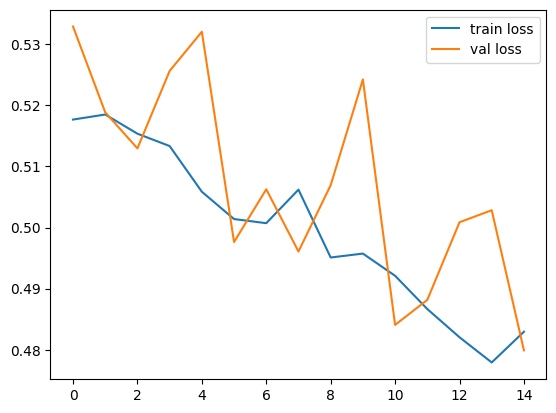

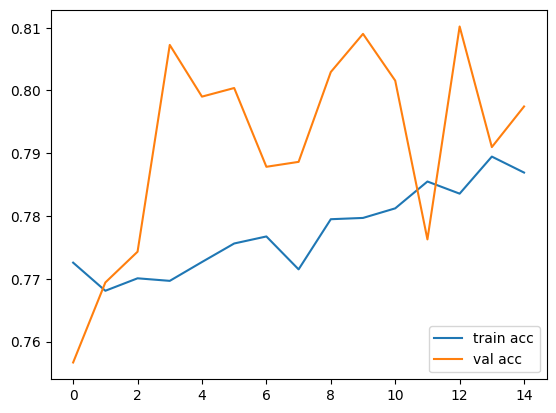

<Figure size 640x480 with 0 Axes>

In [41]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [32]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

model.summary()



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,659 (41.64 KB)

 Trainable params: 10,657 (41.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [37]:


# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(f'{path}/PetImages/test/Dogs/0.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [38]:
result

array([[2.80364]], dtype=float32)

In [39]:


if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")



The image classified is dog
